<a href="https://colab.research.google.com/github/lutherkhill/codemash2020/blob/master/codemash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Civic Developers Quest to Change Healthcare**


# LEGAL DISCLAIMER

All content found on the notebook, including: text, images, audio, or other formats were created for informational purposes only. The Content is not intended to be a substitute for professional medical advice, diagnosis, or treatment. Always seek the advice of your physician or other qualified health provider with any questions you may have regarding a medical condition. Never disregard professional medical advice or delay in seeking it because of something you have read on this Notebook.

If you think you may have a medical emergency, call your doctor, go to the emergency department, or call 911 immediately. Luther Hill does not recommend or endorse any specific tests, physicians, products, procedures, opinions, or other information that may be mentioned on Dannemiller.com. Reliance on any information provided by Luther Hill employees, contracted writers, or medical professionals presenting content for publication to Dannemiller is solely at your own risk.

The Site may contain health- or medical-related materials or discussions regarding sexually explicit disease states. If you find these materials offensive, you may notwant to use our Site. The Site and its Content are provided on an "as is" basis.

Links to educational content not created by Luther Hill are taken at your own risk. Dannemiller is not responsible for the claims of external websites and education companies.

# Agenda

# - 1300 to 1350: Intro & Setup
# - 1350 to 1400: Break
# - 1400 to 1450: Build basic model
# - 1450 to 1500: Break
# - 1500 to 1550: Indepth code review
# - 1550 to 1600: Break
# - 1600 to 1630: Deploy model to webapp
# - 1630 to 1700: Conclusion **bold text**


##Description

I was born into one of the worst healthcare systems in the world on the small island of Dominica in the Caribbean. One summer I broke my left forearm and stayed in the hospital for two months and endured 2 surgeries to fix my broken bone. Luckily my family held on to the x-rays from this incident. One day I brought this experience up at work and one of the doctors found this very odd for such a common condition. When he looked at my x-rays he immediately saw the problem. I had two fractures instead of one there were the obvious one and another hairline fracture further up. Due to a lack of trained radiologists and x-ray technicians on the island they missed it which resulted in my extended stay and multiple surgeries in the hospital. Back then I couldn’t do anything about it or help the countless others who were in my position, but now I can and now so can you. With the advent of AI/ML and large public data sets, we are empowered to provide solutions to people all over the world.

I am on a quest to change the way we approach solving the healthcare crisis in this world. In the past, we have focused on asking the experts to solve it and implemented a technocratic management style. I want to change that dynamic to be focused on the Civic Developer and empowering them. We will do this by using massive public data sets and minimal coding implementations of Artificial Intelligence. By using an open-source management style we can leverage the power of the crowd to solve these problems for the world.

## Problem
Problem (10 minutes)
The world lacks enough qualified physicians that are trained to read medical imaging. Even though the x-ray is the most common medical image, there are not enough people who can quicking and accurately diagnose unfamiliar or complex problems. Doctors based on their training and work experience are not always familiar with certain medical conditions.
This can put the patient at risk and slow down the delivery of care.
One of the biggest barriers in delivering a solution is limited connectivity in remote parts of the world.

## Why it matters

There is an urgent and growing need to deliver quality healthcare to developing parts of the world. Billions of people could have their lives measurably improved with these simple applications you can build today.




##Goals for talk

We will build and deploy a model tht meets the current state of the art for chest x-ray disease prediction using the F-Beta and or AUC-ROC socring metric.

# **The dataset**

For this application we used PyTorch and FastAi libary to design our model. We got our data from Kaggle using the Chest X-ray datset from the National Insitutue of Health (NIH). We used Jupyter notebooks that was hosted in the cloud using Google Colab to build and deploy our model. the Google Colab infrastructure allows us to leverage free resources like Graphical Processing Units (GPU) and SSD hard drives. 

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#import usefull dependencies
from IPython.display import YouTubeVideo
from IPython.display import IFrame

#import pytorch dependencies
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict

# load fastai dependencies
import fastai
from fastai.vision import *
from fastai.metrics import *

# Imports for diverse utilities
import torchvision.models as models
from tqdm import tqdm
from shutil import copyfile
import matplotlib.pyplot as plt
import operator
from PIL import Image
from sys import intern
from sklearn.metrics import roc_auc_score, recall_score

#conect to google drive to easier storeage and redundency
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/heart_disease/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/heart_disease


## Get the data
The NIH dataset is freely availble on kaggle. For this exercise we will be using a smaple set o the data. Let's see how to do this by using the Kaggle API as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add source activate fastai or similar, or prefix pip with a path. Have a look at how conda install is called for your platform in the appropriate Returning to work section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [0]:
# install the kaggle command line tool
# ! {sys.executable} -m pip install kaggle --upgrade

You're all set to download the data from planet competition. You first need to go to its main page and accept its rules, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a 403 forbidden error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on Rules tab, and then scroll to the bottom to find the accept button).

In [0]:
# this will download the dataset right into your gdrive and unzip the file
# !kaggle datasets download -d nih-chest-xrays/sample
# !unzip -q sample.zip
# !zip -FF data.zip data2.zip
# !unzip data2.zip

#**The model**
Our base architecture is `resnet50` again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of accuracy. We determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

> Indented block



In [0]:
def auroc_score(input_, target):
    input_, target = input_.cpu().numpy(), target.cpu().numpy() #.reshape(-1, learn.data.c)
    score = []
    for i in range(14):
        try: 
            score.append(roc_auc_score(target[:,i], input_[:,i]))
        except ValueError:
            score.append(0)
    
    return np.array(score).mean()

#     def __init__(self):
#         pass

class AUROC(Callback):
    _order = -20 #Needs to run before the recorder
    def on_epoch_begin(self, **kwargs): self.output, self.target = [], []
    
    def on_batch_end(self, last_target, last_output, train, **kwargs):
        if not train:
            self.output.append(last_output)
            self.target.append(last_target)
                
    def on_epoch_end(self, last_metrics, **kwargs):
        if len(self.output) > 0:
            output = torch.cat(self.output)
            target = torch.cat(self.target)
            metric = auroc_score(output, target)
            return add_metrics(last_metrics, metric)

## Basic Model

### Load data

In [0]:
#load data into data drame for exploration
xray_data = pd.read_csv('sample_data/sample_labels.csv')

#see how many observations there are
num_obs = len(xray_data)
print('Number of obervations: ',num_obs)

Number of obervations:  5606


In [0]:
# had to learn this part from scratch, hadn't gone so deep into file paths before!
# looked at glob & os documentation, along with Kevin's methodology to get this part working
# note: DON'T adjust this code, it's short but took a long time to get right
# https://docs.python.org/3/library/glob.html
# https://docs.python.org/3/library/os.html
# https://www.geeksforgeeks.org/os-path-module-python/ 
    
from glob import glob
#import os # already imported earlier

my_glob = glob('sample_data/sample/images/*.png')
print('Number of Observations: ', len(my_glob)) # check to make sure I've captured every pathway, should equal 112,120

Number of Observations:  5618


In [0]:
# Map the image paths onto xray_data
# Credit: small helper code fragment adapted from Kevin Mader - Simple XRay CNN on 12/09/18
# https://www.kaggle.com/kmader/train-simple-xray-cnn
full_img_paths = {os.path.basename(x): x for x in my_glob}
xray_data['full_path'] = xray_data['Image Index'].map(full_img_paths.get)

### Explore Data

In [0]:
# load help packages
import pandas as pd

import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # additional plotting functionality

Number of unique labels: 244
                                                   Finding Labels
No Finding                                                   3044
Infiltration                                                  503
Effusion                                                      203
Atelectasis                                                   192
Nodule                                                        144
...                                                           ...
Effusion|Fibrosis|Mass|Nodule                                   1
Atelectasis|Consolidation|Edema                                 1
Effusion|Emphysema|Infiltration                                 1
Emphysema|Infiltration|Mass|Pneumothorax                        1
Atelectasis|Emphysema|Fibrosis|Pleural_Thickening               1

[244 rows x 1 columns]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdea226d080>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  <a list of 20 Text xticklabel objects>))

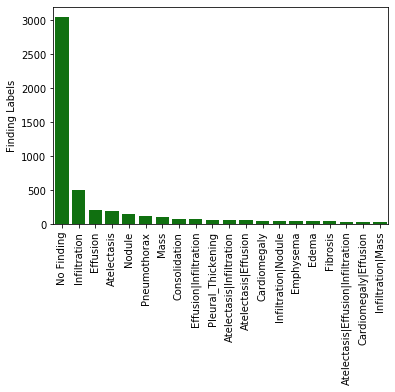

In [0]:
# Explore the dataset a bit

# Q: how many unique labels are there? A: many (836) because of co-occurence
# Note: co-occurence will turn out to be a real pain to deal with later, but there are several techniques that help us work with it successfully
num_unique_labels = xray_data['Finding Labels'].nunique()
print('Number of unique labels:',num_unique_labels)

# let's look at the label distribution to better plan our next step
count_per_unique_label = xray_data['Finding Labels'].value_counts() # get frequency counts per label
df_count_per_unique_label = count_per_unique_label.to_frame() # convert series to dataframe for plotting purposes

print(df_count_per_unique_label) # view tabular results
sns.barplot(x = df_count_per_unique_label.index[:20], y="Finding Labels", data=df_count_per_unique_label[:20], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

In [0]:
# define dummy labels for one hot encoding - simplifying to 14 primary classes (excl. No Finding)
dummy_labels = ['Atelectasis','Consolidation','Infiltration','Pneumothorax','Edema','Emphysema','Fibrosis','Effusion','Pneumonia','Pleural_Thickening','Cardiomegaly','Nodule','Mass','Hernia']

# now, let's see how many cases present for each of of our 14 clean classes (which excl. 'No Finding')
clean_labels = xray_data[dummy_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

KeyError: ignored

In [0]:
## MODEL CREATION PHASE STARTS HERE

# dop NA values
df = xray_data.dropna()
df.head(-1) # take a look to ensure target_vector makes sense

Image Index  ...                                   full_path
0     00000013_005.png  ...  sample_data/sample/images/00000013_005.png
1     00000013_026.png  ...  sample_data/sample/images/00000013_026.png
2     00000017_001.png  ...  sample_data/sample/images/00000017_001.png
3     00000030_001.png  ...  sample_data/sample/images/00000030_001.png
4     00000032_001.png  ...  sample_data/sample/images/00000032_001.png
...                ...  ...                                         ...
5600  00030704_000.png  ...  sample_data/sample/images/00030704_000.png
5601  00030712_000.png  ...  sample_data/sample/images/00030712_000.png
5602  00030786_005.png  ...  sample_data/sample/images/00030786_005.png
5603  00030789_000.png  ...  sample_data/sample/images/00030789_000.png
5604  00030792_000.png  ...  sample_data/sample/images/00030792_000.png

[5605 rows x 12 columns]

### Create Databunch

In [0]:
# sets the transformation for the dat to crop out unused parts of the image
#tfms = zoom_crop(scale=(0.50,1), do_rand=False, p=1)
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=5,
                      max_zoom=1.03,
                      max_lighting=0.03,
                      max_warp=0.03,
                      p_affine=0.05,
                      p_lighting=0.05,
                      )

In [0]:
os.chdir("/gdrive/My Drive")
!pwd

/gdrive/My Drive


In [0]:

#create img databunch
path =''
data = ImageDataBunch.from_df( path,
                              df= df, 
                              label_delim='|',
                              valid_pct=0.2, seed=42, 
                              fn_col='full_path', 
                              label_col='Finding Labels',
                              size=512,
                              bs=36).normalize(imagenet_stats)
#see number of training and validation set
data.c, len(data.train_ds), len(data.valid_ds)

(15, 4485, 1121)

In [0]:
# data bunch information
data

ImageDataBunch;

Train: LabelList (4485 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Emphysema;Infiltration;Pleural_Thickening;Pneumothorax,Cardiomegaly;Emphysema,No Finding,Atelectasis,Cardiomegaly;Edema;Effusion
Path: .;

Valid: LabelList (1121 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
No Finding,No Finding,Mass;Nodule,No Finding,Consolidation;Mass
Path: .;

Test: None

In [0]:
# list the names of you data classes
data.c, data.classes

(15,
 ['Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Effusion',
  'Emphysema',
  'Fibrosis',
  'Hernia',
  'Infiltration',
  'Mass',
  'No Finding',
  'Nodule',
  'Pleural_Thickening',
  'Pneumonia',
  'Pneumothorax'])

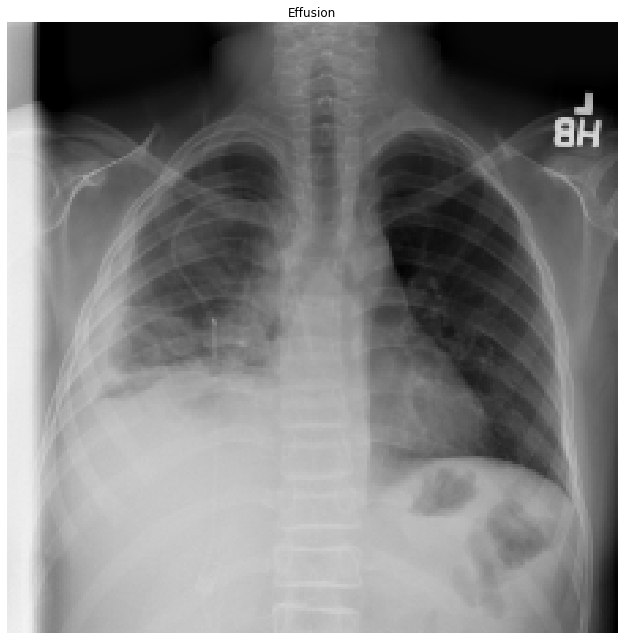

In [0]:
#display data bunch
# size/quality of the image matters greatly from medical imaging analysis
data.show_batch(rows=1, figsize=(12,9))

In [0]:
# create convolutional neural network and return the accuracy metric
basic_learner = cnn_learner(data, models.resnet34, metrics=[fbeta, AUROC()])
#GoogleNet = cnn_learner(data, models.googlenet, metrics=[AUROC(), fbeta]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 43.6MB/s]


In [0]:
#freeze first 2 layer groups and unfreeze the rest
#ResNet.freeze_to(0)

#ResNet.unfreeze()

basic_learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [64, 128, 128]       36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


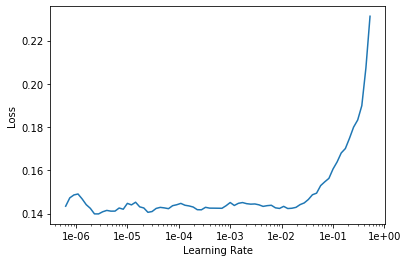

In [0]:
 # find the ideal inital learning rate for your model
basic_learner.lr_find()
basic_learner.recorder.plot()

In [0]:
# to pic the ideal learning rate we find the stepest part of the curve and back it up by a factor of ten.
basic_learner.fit_one_cycle(10, max_lr=1e-05)

In [0]:
# save the initial model
ResNet.save('codemash-WideResNet-16bit')

In [0]:
ResNet.export('/models/codemash-WideResNet-16bit.pkl')

### Metrics

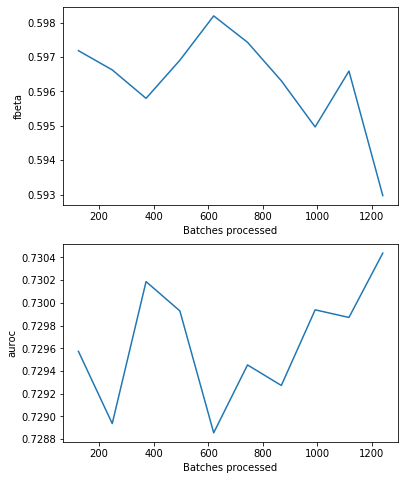

In [0]:
# we will start taking a look a the metrics
basic_learner.recorder.plot_metrics()

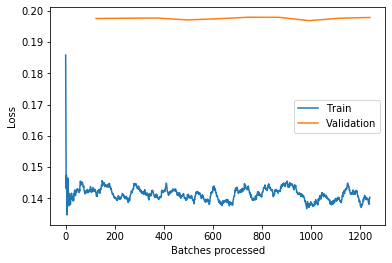

In [0]:
#plot loses
basic_learner.recorder.plot_losses()

In [0]:
#Look at your 9 worst results. By using a heatmap to see what induced the wrong classification:
interp = ClassificationInterpretation.from_learner(basic_learner)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

False

488 misclassified samples over 1121 samples in the validation set.


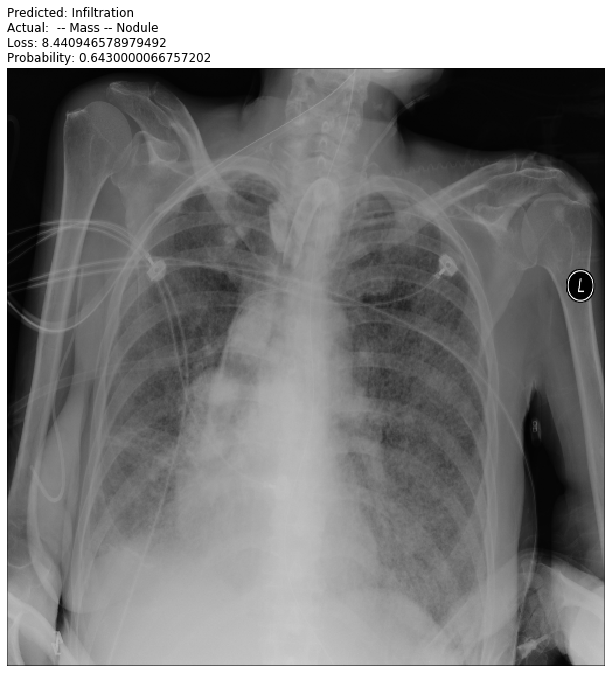

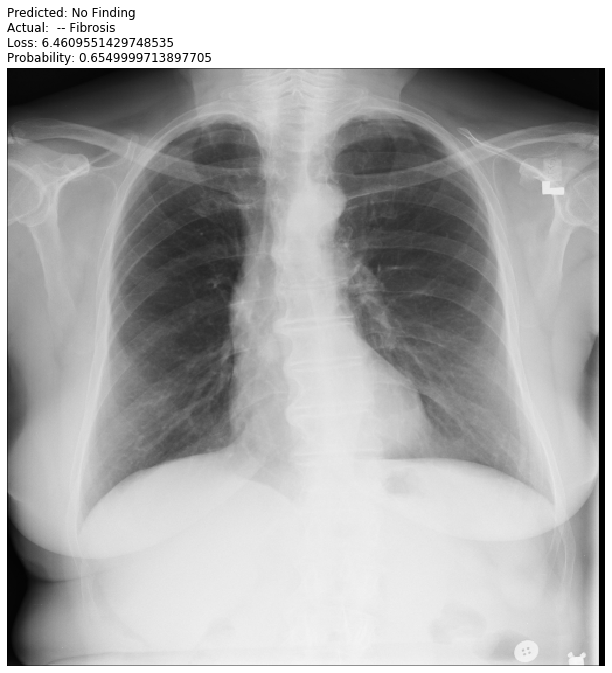

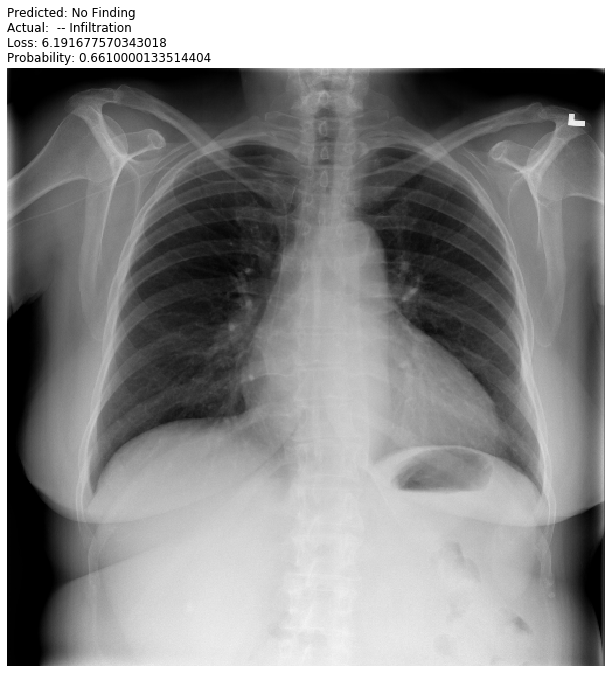

In [0]:
#plot top losses
interp.plot_multi_top_losses(3, figsize=(20,11))

In [0]:
interp.most_confused(min_val=2)

[('Atelectasis', 'No Finding', 11621),
 ('Atelectasis', 'Infiltration', 1760),
 ('Atelectasis', 'Effusion', 1082),
 ('Cardiomegaly', 'No Finding', 994),
 ('Atelectasis', 'Pneumothorax', 377),
 ('Cardiomegaly', 'Infiltration', 175),
 ('Cardiomegaly', 'Effusion', 118),
 ('Atelectasis', 'Emphysema', 78),
 ('Atelectasis', 'Nodule', 56),
 ('Atelectasis', 'Cardiomegaly', 55),
 ('Atelectasis', 'Mass', 53),
 ('Cardiomegaly', 'Pneumothorax', 43),
 ('Cardiomegaly', 'Atelectasis', 38),
 ('Atelectasis', 'Pleural_Thickening', 14),
 ('Cardiomegaly', 'Emphysema', 12),
 ('Cardiomegaly', 'Mass', 7),
 ('Cardiomegaly', 'Nodule', 4)]

In [0]:
#show class confusion
interp = ClassificationInterpretation.from_learner(basic_learner)

#class list == NIH categories
classlist = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 
             'Pleural_thickening', 'Cardiomegaly', 'Nodule Mass', 'Hernia']

#classlist = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly'

classConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

NameError: ignored

In [0]:
#import fast ai widgets to start pruning data
from fastai.widgets import *
losses,idxs = interp.top_losses()
#to del img in test set use 'test_ds'
top_loss_paths = data.valid_ds.x[idxs]

IndexError: ignored

In [0]:
#file deleter widget for indivdual img deleting
fd = FileDeleter(file_paths=top_loss_paths)

In [0]:
# EXPORT MODEL
learner.export('codemash-resnet50-16bit'')

## Intermediate Model

### Load data

In [0]:
# set path to data
#path = "data/"

#load data into data drame for exploration
xray_data = pd.read_csv('sample_data/updated_sample_label.csv')

#see how many observations there are
num_obs = len(xray_data)
print('Number of obervations: ',num_obs)

Number of obervations:  1127


In [0]:
# had to learn this part from scratch, hadn't gone so deep into file paths before!
# looked at glob & os documentation, along with Kevin's methodology to get this part working
# note: DON'T adjust this code, it's short but took a long time to get right
# https://docs.python.org/3/library/glob.html
# https://docs.python.org/3/library/os.html
# https://www.geeksforgeeks.org/os-path-module-python/ 
    
from glob import glob
#import os # already imported earlier

my_glob = glob('sample_data/sample/images/*.png')
print('Number of Observations: ', len(my_glob)) # check to make sure I've captured every pathway, should equal 112,120

Number of Observations:  5618


In [0]:
# Map the image paths onto xray_data
# Credit: small helper code fragment adapted from Kevin Mader - Simple XRay CNN on 12/09/18
# https://www.kaggle.com/kmader/train-simple-xray-cnn
full_img_paths = {os.path.basename(x): x for x in my_glob}
xray_data['full_path'] = xray_data['Image Index'].map(full_img_paths.get)

### Explore Data

Number of unique labels: 25
                                                 Finding Labels
Atelectasis                                                 317
Effusion                                                    238
Consolidation                                               123
Atelectasis|Effusion                                        114
Edema                                                        76
Cardiomegaly                                                 66
Cardiomegaly|Effusion                                        43
Consolidation|Effusion                                       33
Atelectasis|Consolidation                                    28
Atelectasis|Consolidation|Effusion                           23
Edema|Effusion                                               18
Atelectasis|Cardiomegaly|Effusion                             8
Cardiomegaly|Edema                                            7
Cardiomegaly|Consolidation                                    5
Atelectasis|

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdea192e5c0>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  <a list of 20 Text xticklabel objects>))

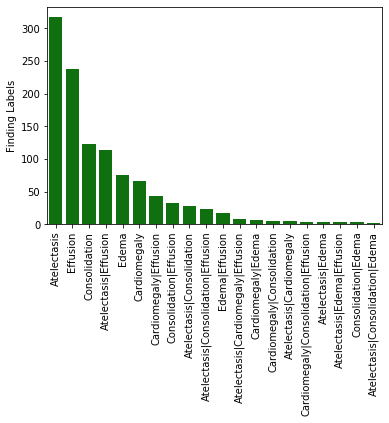

In [0]:
# Explore the dataset a bit

# Q: how many unique labels are there? A: many (836) because of co-occurence
# Note: co-occurence will turn out to be a real pain to deal with later, but there are several techniques that help us work with it successfully
num_unique_labels = xray_data['Finding Labels'].nunique()
print('Number of unique labels:',num_unique_labels)

# let's look at the label distribution to better plan our next step
count_per_unique_label = xray_data['Finding Labels'].value_counts() # get frequency counts per label
df_count_per_unique_label = count_per_unique_label.to_frame() # convert series to dataframe for plotting purposes

print(df_count_per_unique_label) # view tabular results
sns.barplot(x = df_count_per_unique_label.index[:20], y="Finding Labels", data=df_count_per_unique_label[:20], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

1. Delete the following labels

- delete hernia- not cinically relevant

- delete pneumothorax- not clinically relevant becaue case already had tubes and were treated

- delete Pneumonia, emphysema, and most of fibrosis : these are diagnosed clnically not based on imaging

2. keep the following 5 labels that are relevant

- atelectasis, cardiomegaly, consolidation, edema, pleural effusion





In [0]:
# define dummy labels for one hot encoding - simplifying to 5 primary classes (excl. No Finding)
dummy_labels = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly']

# now, let's see how many cases present for each of of our 14 clean classes (which excl. 'No Finding')
clean_labels = xray_data[dummy_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

KeyError: ignored

In [0]:
## MODEL CREATION PHASE STARTS HERE

# drop NA values
df = xray_data.dropna()
df.head(-1) # take a look to ensure target_vector makes sense

Image Index  ...                                   full_path
0     00000030_001.png  ...  sample_data/sample/images/00000030_001.png
1     00000175_001.png  ...  sample_data/sample/images/00000175_001.png
2     00000175_002.png  ...  sample_data/sample/images/00000175_002.png
3     00000642_000.png  ...  sample_data/sample/images/00000642_000.png
4     00000816_000.png  ...  sample_data/sample/images/00000816_000.png
...                ...  ...                                         ...
1121  00019087_044.png  ...  sample_data/sample/images/00019087_044.png
1122  00019464_004.png  ...  sample_data/sample/images/00019464_004.png
1123  00021086_009.png  ...  sample_data/sample/images/00021086_009.png
1124  00028762_001.png  ...  sample_data/sample/images/00028762_001.png
1125  00003685_004.png  ...  sample_data/sample/images/00003685_004.png

[1126 rows x 12 columns]

### Create Databunch

In [0]:
# sets the transformation for the dat to crop out unused parts of the image
#tfms = zoom_crop(scale=(0.50,1), do_rand=False, p=1)
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=5,
                      max_zoom=1.03,
                      max_lighting=0.03,
                      max_warp=0.03,
                      p_affine=0.05,
                      p_lighting=0.05,
                      )

In [0]:
os.chdir("/gdrive/My Drive")
!pwd

/gdrive/My Drive


In [0]:

#create img databunch
path =''
data = ImageDataBunch.from_df( path,
                              df= df, 
                              label_delim='|',
                              valid_pct=0.2, seed=42, 
                              fn_col='full_path', 
                              label_col='Finding Labels',
                              size=512,
                              bs=36).normalize(imagenet_stats)
#see number of training and validation set
data.c, len(data.train_ds), len(data.valid_ds)

(5, 902, 225)

In [0]:
# data bunch information
data

ImageDataBunch;

Train: LabelList (902 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Atelectasis,Atelectasis,Atelectasis,Atelectasis,Atelectasis
Path: .;

Valid: LabelList (225 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Effusion,Effusion,Consolidation;Effusion,Atelectasis,Effusion
Path: .;

Test: None

In [0]:
# list the names of you data classes
data.c, data.classes

(6,
 ['Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Effusion',
  'Hernia'])

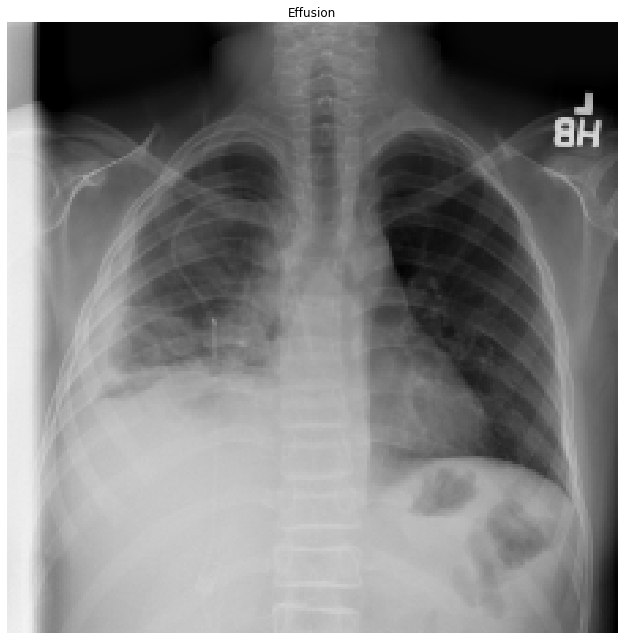

In [0]:
#display data bunch
# size/quality of the image matters greatly from medical imaging analysis
data.show_batch(rows=1, figsize=(12,9))

In [0]:
# create convolutional neural network and return the accuracy metric
advanced_learner = cnn_learner(data, models.resnet34, metrics=[fbeta])
#GoogleNet = cnn_learner(data, models.googlenet, metrics=[AUROC(), fbeta]).to_fp16()

In [0]:
#freeze first 2 layer groups and unfreeze the rest
advanced_learner.freeze_to(0)

#unfreeze all layers
#ResNet.unfreeze()

advanced_learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [64, 128, 128]       36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


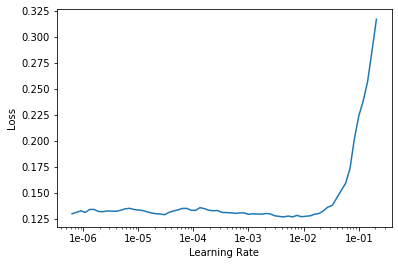

In [0]:
 # find the ideal inital learning rate for your model
advanced_learner.lr_find()
advanced_learner.recorder.plot()

In [0]:
# to pic the ideal learning rate we find the stepest part of the curve and back it up by a factor of ten.
advanced_learner.fit_one_cycle(20, max_lr=1e-02)

In [0]:
# save the initial model
ResNet.save('codemash-WideResNet-16bit')

In [0]:
ResNet.export('/models/codemash-WideResNet-16bit.pkl')

### Metrics

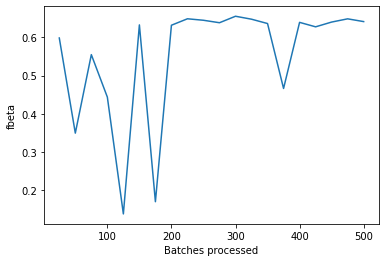

In [0]:
# we will start taking a look a the metrics
advanced_learner.recorder.plot_metrics()

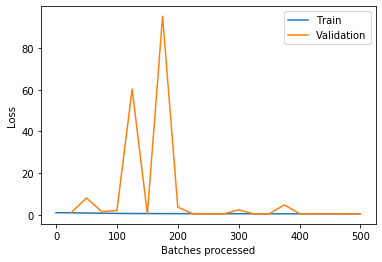

In [0]:
#plot loses
advanced_learner.recorder.plot_losses()

In [0]:
#Look at your 9 worst results. By using a heatmap to see what induced the wrong classification:
interp = ClassificationInterpretation.from_learner(advanced_learner)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

False

115 misclassified samples over 225 samples in the validation set.


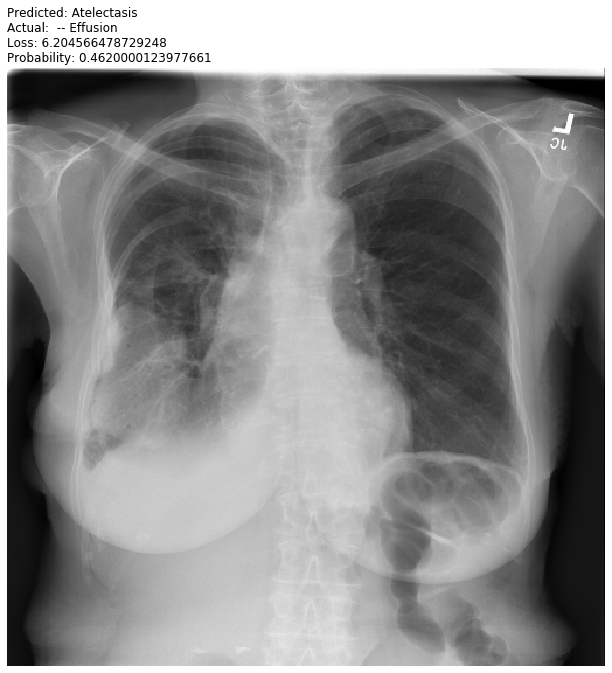

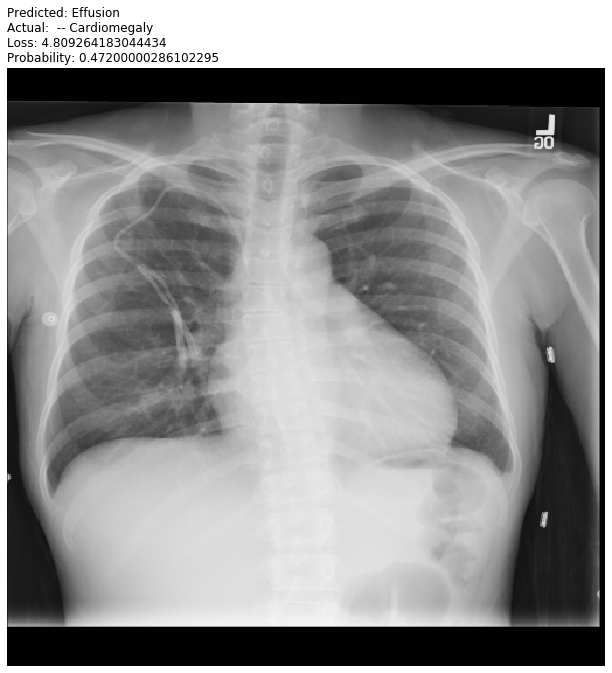

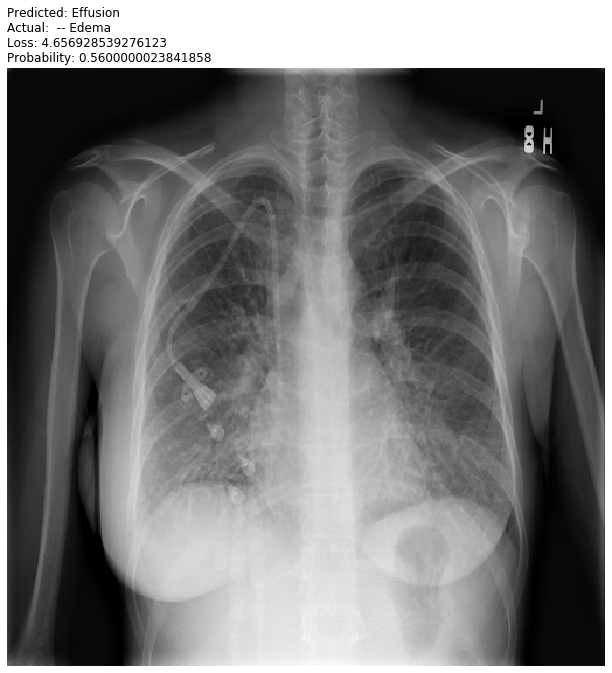

In [0]:
#plot top losses
interp.plot_multi_top_losses(3, figsize=(20,11))

In [0]:
interp.most_confused(min_val=100)

[('Atelectasis', 'Effusion', 387),
 ('Cardiomegaly', 'Atelectasis', 155),
 ('Cardiomegaly', 'Effusion', 143)]

In [0]:
#show class confusion
interp = ClassificationInterpretation.from_learner(learn

#class list == NIH categories
classlist = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 
             'Pleural_thickening', 'Cardiomegaly', 'Nodule Mass', 'Hernia']

#classlist = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly'

classConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

In [0]:
#import fast ai widgets to start pruning data
from fastai.widgets import *
losses,idxs = interp.top_losses()
#to del img in test set use 'test_ds'
top_loss_paths = data.valid_ds.x[idxs]

IndexError: ignored

In [0]:
#file deleter widget for indivdual img deleting
fd = FileDeleter(file_paths=top_loss_paths)

In [0]:
# EXPORT MODEL
learner.export('codemash-resnet50-16bit'')

## Advanced Model

### Load data

In [91]:
# set path to data
#path = "data/"

#load data into data drame for exploration
xray_data = pd.read_csv('data/updated_full_labels.csv')

#see how many observations there are
num_obs = len(xray_data)
print('Number of obervations: ',num_obs)

Number of obervations:  27195


In [93]:
# had to learn this part from scratch, hadn't gone so deep into file paths before!
# looked at glob & os documentation, along with Kevin's methodology to get this part working
# note: DON'T adjust this code, it's short but took a long time to get right
# https://docs.python.org/3/library/glob.html
# https://docs.python.org/3/library/os.html
# https://www.geeksforgeeks.org/os-path-module-python/ 
    
from glob import glob
#import os # already imported earlier

my_glob = glob('data/images*/*.png')
print('Number of Observations: ', len(my_glob)) # check to make sure I've captured every pathway, should equal 112,120

Number of Observations:  112132


In [0]:
# Map the image paths onto xray_data
# Credit: small helper code fragment adapted from Kevin Mader - Simple XRay CNN on 12/09/18
# https://www.kaggle.com/kmader/train-simple-xray-cnn
full_img_paths = {os.path.basename(x): x for x in my_glob}
xray_data['full_path'] = xray_data['Image Index'].map(full_img_paths.get)

### Explore Data

Number of unique labels: 35
                                                    Finding Labels
Effusion                                                      8038
Atelectasis                                                   7320
Atelectasis|Effusion                                          2527
Consolidation                                                 2516
Cardiomegaly                                                  1436
Edema                                                         1436
Cardiomegaly|Effusion                                          757
Consolidation|Effusion                                         702
Atelectasis|Consolidation                                      685
Atelectasis|Consolidation|Effusion                             450
Edema|Effusion                                                 426
Atelectasis|Cardiomegaly|Effusion                              166
Atelectasis|Cardiomegaly                                       137
Atelectasis|Edema                 

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde59f5de80>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  <a list of 20 Text xticklabel objects>))

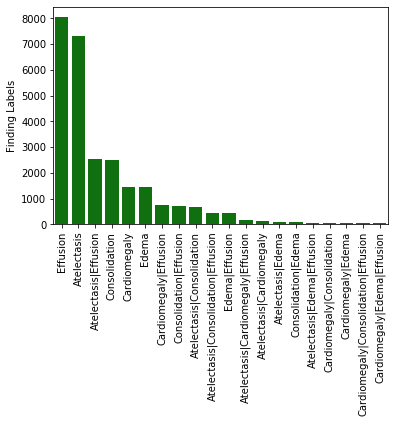

In [96]:
# Explore the dataset a bit

# Q: how many unique labels are there? A: many (836) because of co-occurence
# Note: co-occurence will turn out to be a real pain to deal with later, but there are several techniques that help us work with it successfully
num_unique_labels = xray_data['Finding Labels'].nunique()
print('Number of unique labels:',num_unique_labels)

# let's look at the label distribution to better plan our next step
count_per_unique_label = xray_data['Finding Labels'].value_counts() # get frequency counts per label
df_count_per_unique_label = count_per_unique_label.to_frame() # convert series to dataframe for plotting purposes

print(df_count_per_unique_label) # view tabular results
sns.barplot(x = df_count_per_unique_label.index[:20], y="Finding Labels", data=df_count_per_unique_label[:20], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

1. Delete the following labels

- delete hernia- not cinically relevant

- delete pneumothorax- not clinically relevant becaue case already had tubes and were treated

- delete Pneumonia, emphysema, and most of fibrosis : these are diagnosed clnically not based on imaging

2. keep the following 5 labels that are relevant

- atelectasis, cardiomegaly, consolidation, edema, pleural effusion





In [97]:
# define dummy labels for one hot encoding - simplifying to 5 primary classes (excl. No Finding)
dummy_labels = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly']

# now, let's see how many cases present for each of of our 14 clean classes (which excl. 'No Finding')
clean_labels = xray_data[dummy_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

KeyError: ignored

In [98]:
## MODEL CREATION PHASE STARTS HERE

# drop NA values
df = xray_data.dropna()
df.head(-1) # take a look to ensure target_vector makes sense

Image Index  ...                        full_path
0      00000001_000.png  ...  data/images_01/00000001_000.png
1      00000001_001.png  ...  data/images_01/00000001_001.png
2      00000001_002.png  ...  data/images_01/00000001_002.png
3      00000005_007.png  ...  data/images_01/00000005_007.png
4      00000008_000.png  ...  data/images_01/00000008_000.png
...                 ...  ...                              ...
27189  00030786_002.png  ...  data/images_12/00030786_002.png
27190  00030786_003.png  ...  data/images_12/00030786_003.png
27191  00030786_004.png  ...  data/images_12/00030786_004.png
27192  00030786_005.png  ...  data/images_12/00030786_005.png
27193  00030786_006.png  ...  data/images_12/00030786_006.png

[27192 rows x 12 columns]

### Create Databunch

In [0]:
# sets the transformation for the dat to crop out unused parts of the image
#tfms = zoom_crop(scale=(0.50,1), do_rand=False, p=1)
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=5,
                      max_zoom=1.03,
                      max_lighting=0.03,
                      max_warp=0.03,
                      p_affine=0.05,
                      p_lighting=0.05,
                      )

In [99]:

#create img databunch
path =''
data = ImageDataBunch.from_df( path,
                              df= df, 
                              label_delim='|',
                              valid_pct=0.2, seed=42, 
                              fn_col='full_path', 
                              label_col='Finding Labels',
                              size=512,
                              bs=36).normalize(imagenet_stats)
#see number of training and validation set
data.c, len(data.train_ds), len(data.valid_ds)

(5, 21755, 5438)

In [100]:
# data bunch information
data

ImageDataBunch;

Train: LabelList (21755 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Cardiomegaly,Cardiomegaly,Cardiomegaly;Effusion,Cardiomegaly,Effusion
Path: .;

Valid: LabelList (5438 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Atelectasis;Effusion,Atelectasis,Consolidation,Consolidation,Atelectasis
Path: .;

Test: None

In [0]:
# list the names of you data classes
data.c, data.classes

(6,
 ['Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Effusion',
  'Hernia'])

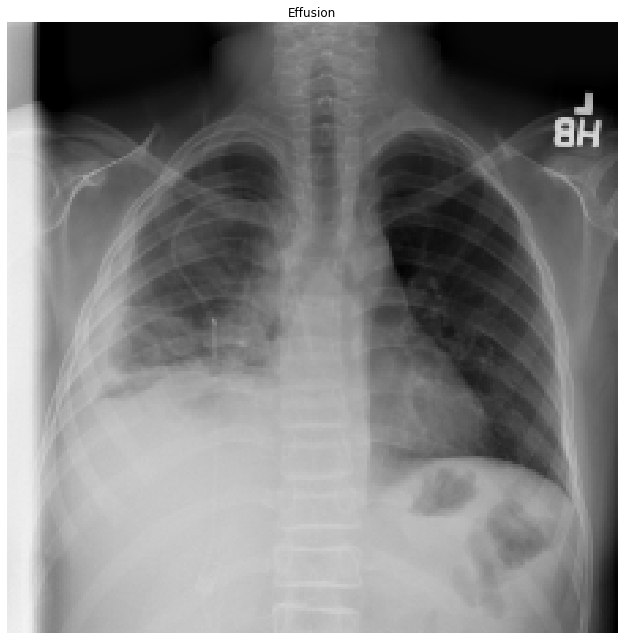

In [0]:
#display data bunch
# size/quality of the image matters greatly from medical imaging analysis
data.show_batch(rows=1, figsize=(12,9))

In [0]:
# create convolutional neural network and return the accuracy metric
advanced_learner = cnn_learner(data, models.resnet34, metrics=[fbeta])
#GoogleNet = cnn_learner(data, models.googlenet, metrics=[AUROC(), fbeta]).to_fp16()

In [102]:
#freeze first 2 layer groups and unfreeze the rest
advanced_learner.freeze_to(0)

#unfreeze all layers
#ResNet.unfreeze()

advanced_learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [64, 128, 128]       36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


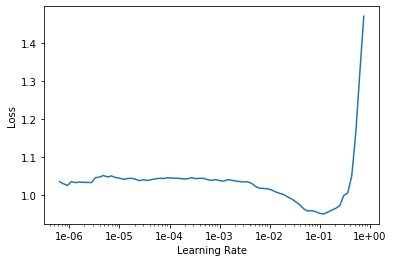

In [103]:
 # find the ideal inital learning rate for your model
advanced_learner.lr_find()
advanced_learner.recorder.plot()

In [1]:
# to pic the ideal learning rate we find the stepest part of the curve and back it up by a factor of ten.
advanced_learner.fit_one_cycle(5, max_lr=1e-02)

NameError: ignored

In [0]:
# save the initial model
ResNet.save('codemash-WideResNet-16bit')

In [0]:
ResNet.export('/models/codemash-WideResNet-16bit.pkl')

### Metrics

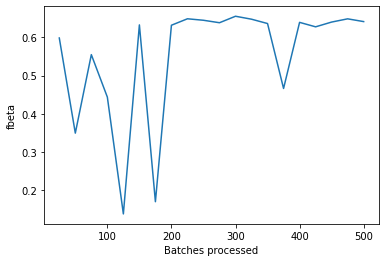

In [0]:
# we will start taking a look a the metrics
advanced_learner.recorder.plot_metrics()

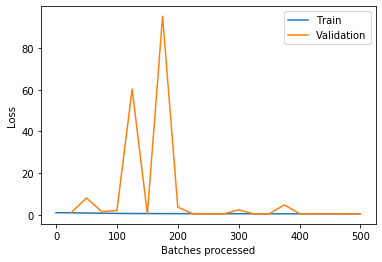

In [0]:
#plot loses
advanced_learner.recorder.plot_losses()

In [0]:
#Look at your 9 worst results. By using a heatmap to see what induced the wrong classification:
interp = ClassificationInterpretation.from_learner(advanced_learner)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

False

115 misclassified samples over 225 samples in the validation set.


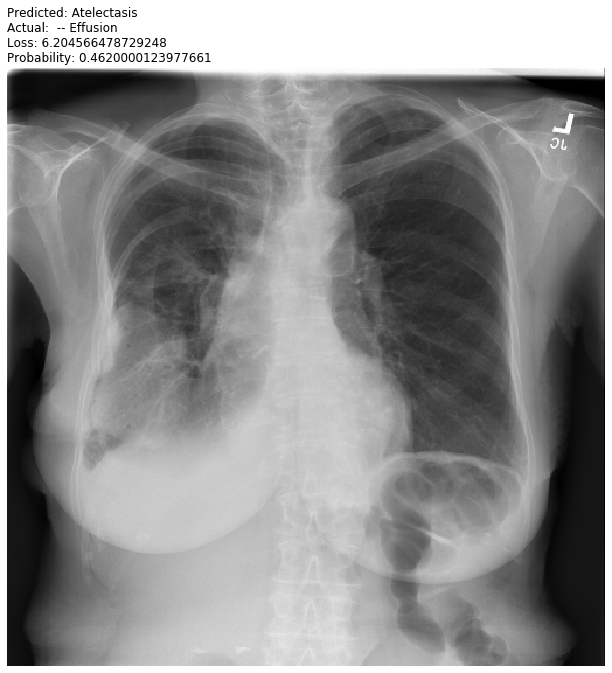

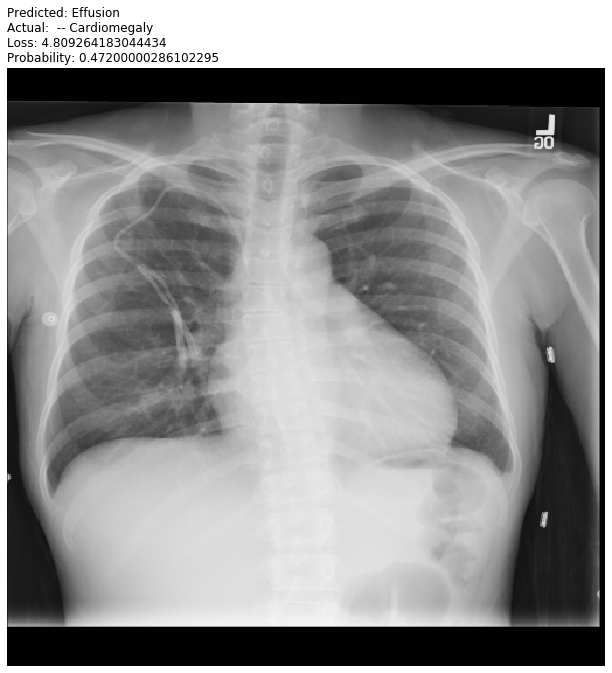

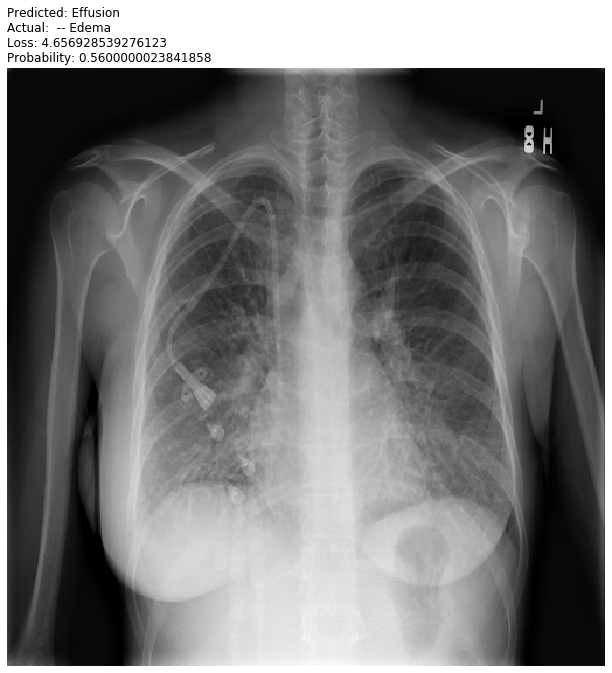

In [0]:
#plot top losses
interp.plot_multi_top_losses(3, figsize=(20,11))

In [0]:
interp.most_confused(min_val=100)

[('Atelectasis', 'Effusion', 387),
 ('Cardiomegaly', 'Atelectasis', 155),
 ('Cardiomegaly', 'Effusion', 143)]

In [0]:
#show class confusion
interp = ClassificationInterpretation.from_learner(learn

#class list == NIH categories
classlist = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 
             'Pleural_thickening', 'Cardiomegaly', 'Nodule Mass', 'Hernia']

#classlist = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly'

classConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

In [0]:
#import fast ai widgets to start pruning data
from fastai.widgets import *
losses,idxs = interp.top_losses()
#to del img in test set use 'test_ds'
top_loss_paths = data.valid_ds.x[idxs]

IndexError: ignored

In [0]:
#file deleter widget for indivdual img deleting
fd = FileDeleter(file_paths=top_loss_paths)

In [0]:
# EXPORT MODEL
learner.export('codemash-resnet50-16bit'')

## Experimental Model

### Load data

In [0]:
# set path to data
#path = "data/"

#load data into data drame for exploration
xray_data = pd.read_csv('data/updated_full_labels.csv')

#see how many observations there are
num_obs = len(xray_data)
print('Number of obervations: ',num_obs)

Number of obervations:  27195


In [0]:
# had to learn this part from scratch, hadn't gone so deep into file paths before!
# looked at glob & os documentation, along with Kevin's methodology to get this part working
# note: DON'T adjust this code, it's short but took a long time to get right
# https://docs.python.org/3/library/glob.html
# https://docs.python.org/3/library/os.html
# https://www.geeksforgeeks.org/os-path-module-python/ 
    
from glob import glob
#import os # already imported earlier

my_glob = glob('data/images*/*.png')
print('Number of Observations: ', len(my_glob)) # check to make sure I've captured every pathway, should equal 112,120

Number of Observations:  112132


In [0]:
# Map the image paths onto xray_data
# Credit: small helper code fragment adapted from Kevin Mader - Simple XRay CNN on 12/09/18
# https://www.kaggle.com/kmader/train-simple-xray-cnn
full_img_paths = {os.path.basename(x): x for x in my_glob}
xray_data['full_path'] = xray_data['Image Index'].map(full_img_paths.get)

### Explore Data

Number of unique labels: 35
                                                    Finding Labels
Effusion                                                      8038
Atelectasis                                                   7320
Atelectasis|Effusion                                          2527
Consolidation                                                 2516
Cardiomegaly                                                  1436
Edema                                                         1436
Cardiomegaly|Effusion                                          757
Consolidation|Effusion                                         702
Atelectasis|Consolidation                                      685
Atelectasis|Consolidation|Effusion                             450
Edema|Effusion                                                 426
Atelectasis|Cardiomegaly|Effusion                              166
Atelectasis|Cardiomegaly                                       137
Atelectasis|Edema                 

(<matplotlib.axes._subplots.AxesSubplot at 0x7fde59f5de80>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  <a list of 20 Text xticklabel objects>))

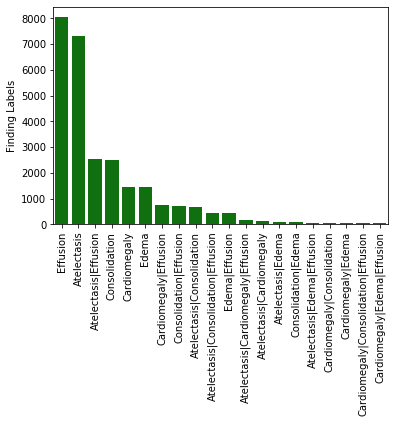

In [0]:
# Explore the dataset a bit

# Q: how many unique labels are there? A: many (836) because of co-occurence
# Note: co-occurence will turn out to be a real pain to deal with later, but there are several techniques that help us work with it successfully
num_unique_labels = xray_data['Finding Labels'].nunique()
print('Number of unique labels:',num_unique_labels)

# let's look at the label distribution to better plan our next step
count_per_unique_label = xray_data['Finding Labels'].value_counts() # get frequency counts per label
df_count_per_unique_label = count_per_unique_label.to_frame() # convert series to dataframe for plotting purposes

print(df_count_per_unique_label) # view tabular results
sns.barplot(x = df_count_per_unique_label.index[:20], y="Finding Labels", data=df_count_per_unique_label[:20], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

1. Delete the following labels

- delete hernia- not cinically relevant

- delete pneumothorax- not clinically relevant becaue case already had tubes and were treated

- delete Pneumonia, emphysema, and most of fibrosis : these are diagnosed clnically not based on imaging

2. keep the following 5 labels that are relevant

- atelectasis, cardiomegaly, consolidation, edema, pleural effusion





In [0]:
# define dummy labels for one hot encoding - simplifying to 5 primary classes (excl. No Finding)
dummy_labels = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly']

# now, let's see how many cases present for each of of our 14 clean classes (which excl. 'No Finding')
clean_labels = xray_data[dummy_labels].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

KeyError: ignored

In [0]:
## MODEL CREATION PHASE STARTS HERE

# drop NA values
df = xray_data.dropna()
df.head(-1) # take a look to ensure target_vector makes sense

Image Index  ...                        full_path
0      00000001_000.png  ...  data/images_01/00000001_000.png
1      00000001_001.png  ...  data/images_01/00000001_001.png
2      00000001_002.png  ...  data/images_01/00000001_002.png
3      00000005_007.png  ...  data/images_01/00000005_007.png
4      00000008_000.png  ...  data/images_01/00000008_000.png
...                 ...  ...                              ...
27189  00030786_002.png  ...  data/images_12/00030786_002.png
27190  00030786_003.png  ...  data/images_12/00030786_003.png
27191  00030786_004.png  ...  data/images_12/00030786_004.png
27192  00030786_005.png  ...  data/images_12/00030786_005.png
27193  00030786_006.png  ...  data/images_12/00030786_006.png

[27192 rows x 12 columns]

### Create Databunch

In [0]:
# sets the transformation for the dat to crop out unused parts of the image
#tfms = zoom_crop(scale=(0.50,1), do_rand=False, p=1)
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=5,
                      max_zoom=1.03,
                      max_lighting=0.03,
                      max_warp=0.03,
                      p_affine=0.05,
                      p_lighting=0.05,
                      )

In [0]:

#create img databunch
path =''
data = ImageDataBunch.from_df( path,
                              df= df, 
                              label_delim='|',
                              valid_pct=0.2, seed=42, 
                              fn_col='full_path', 
                              label_col='Finding Labels',
                              size=512,
                              bs=36).normalize(imagenet_stats)
#see number of training and validation set
data.c, len(data.train_ds), len(data.valid_ds)

(5, 21755, 5438)

In [0]:
# data bunch information
data

ImageDataBunch;

Train: LabelList (21755 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Cardiomegaly,Cardiomegaly,Cardiomegaly;Effusion,Cardiomegaly,Effusion
Path: .;

Valid: LabelList (5438 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: MultiCategoryList
Atelectasis;Effusion,Atelectasis,Consolidation,Consolidation,Atelectasis
Path: .;

Test: None

In [0]:
# list the names of you data classes
data.c, data.classes

(6,
 ['Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Effusion',
  'Hernia'])

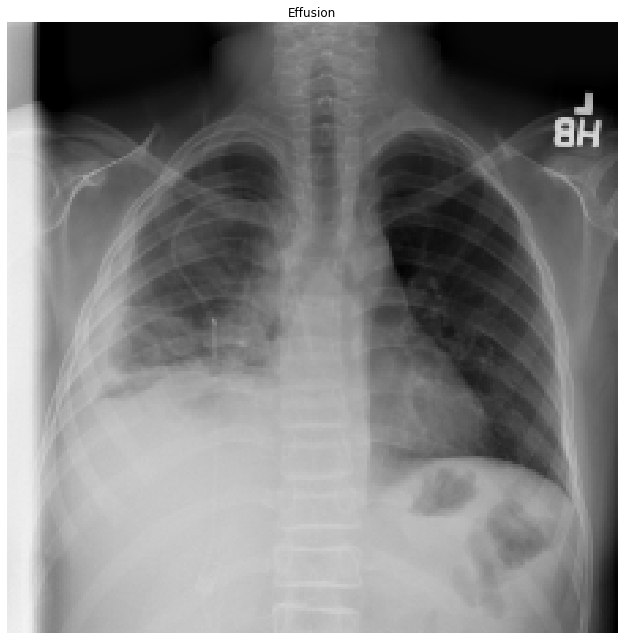

In [0]:
#display data bunch
# size/quality of the image matters greatly from medical imaging analysis
data.show_batch(rows=1, figsize=(12,9))

## Model Notes

Build model follwing these specifications in the folowing order:

(1)
- 4x
- 2d conv layer with 7x7 kernel and stride of 1x1
- batch norm layer
- relu layer
- maxpool layer with kernel size of 3x3 and stride of 2x2

(2)
- 1x
- 2d conv layer with 7x7 kernal and stride of 1x1
- batch norm
- relu layer
- global avg pool

(3)
- 1x
- linear classification layer with output size 5

(4)
- optimizer == SGD(momentum=0.9, The learning rate scheduling is inherited from the ImageNet training pipeline, which warms
up from 0 to 0.1 × 32
256 in 5 epochs, and then decay with a factor of 10 on epoch 30, 60, and 90,
respectively.

In [21]:
# build model as laid out in the specifications

layers = OrderedDict([
                          ('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=7)),
                          ('BatchNorm', nn.BatchNorm2d(32, eps=1e-03, momentum=0.9)),
                          ('relu', nn.ReLU(True)),
                          ('pool', nn.MaxPool2d(kernel_size=3, stride=2)),
                          ('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7)),
                          ('BatchNorm', nn.BatchNorm2d(64, eps=1e-03, momentum=0.9)),
                          ('relu', nn.ReLU(True)),
                          ('pool', nn.MaxPool2d(kernel_size=3, stride=2)),
                          ('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=7)),
                          ('BatchNorm', nn.BatchNorm2d(128, eps=1e-03, momentum=0.9)),
                          ('relu', nn.ReLU(True)),
                          ('pool', nn.MaxPool2d(kernel_size=3, stride=2)),
                          ('conv4', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=7)),
                          ('BatchNorm', nn.BatchNorm2d(256, eps=1e-03, momentum=0.9)),
                          ('relu', nn.ReLU(True)),
                          ('pool', nn.MaxPool2d(kernel_size=3, stride=2)),
                          ('conv4', nn.Conv2d(in_channels=256, out_channels=512, kernel_size=7)),
                          ('BatchNorm', nn.BatchNorm2d(512, eps=1e-03, momentum=0.9)),
                          ('relu', nn.ReLU(True)),
                          ('pool', nn.AvgPool2d(kernel_size=3, stride=2)),
                          ('class', nn.Linear(in_features=512, out_features=5))
    ])

model = nn.Sequential(layers)
model

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (BatchNorm): BatchNorm2d(512, eps=0.001, momentum=0.9, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (pool): AvgPool2d(kernel_size=3, stride=2, padding=0)
  (conv2): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(7, 7), stride=(1, 1))
  (class): Linear(in_features=512, out_features=5, bias=True)
)

In [0]:
# create convolutional neural network and return the accuracy metric
advanced_learner = cnn_learner(data, models.resnet34, metrics=[fbeta])
#GoogleNet = cnn_learner(data, models.googlenet, metrics=[AUROC(), fbeta]).to_fp16()

In [0]:
#freeze first 2 layer groups and unfreeze the rest
advanced_learner.freeze_to(0)

#unfreeze all layers
#ResNet.unfreeze()

advanced_learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [64, 128, 128]       36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


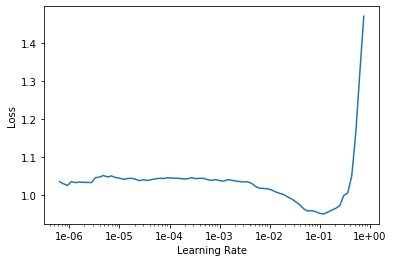

In [0]:
 # find the ideal inital learning rate for your model
advanced_learner.lr_find()
advanced_learner.recorder.plot()

In [0]:
# to pic the ideal learning rate we find the stepest part of the curve and back it up by a factor of ten.
advanced_learner.fit_one_cycle(5, max_lr=1e-02)

NameError: ignored

In [0]:
# save the initial model
ResNet.save('codemash-WideResNet-16bit')

In [0]:
ResNet.export('/models/codemash-WideResNet-16bit.pkl')

### Metrics

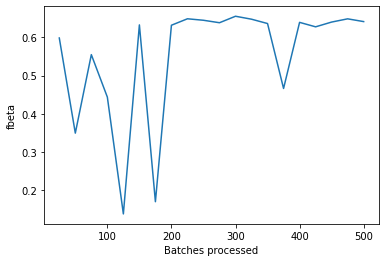

In [0]:
# we will start taking a look a the metrics
advanced_learner.recorder.plot_metrics()

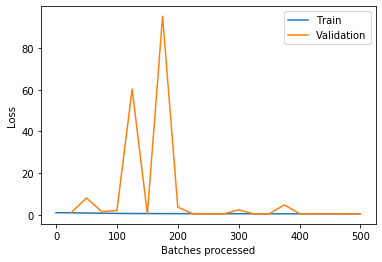

In [0]:
#plot loses
advanced_learner.recorder.plot_losses()

In [0]:
#Look at your 9 worst results. By using a heatmap to see what induced the wrong classification:
interp = ClassificationInterpretation.from_learner(advanced_learner)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

False

115 misclassified samples over 225 samples in the validation set.


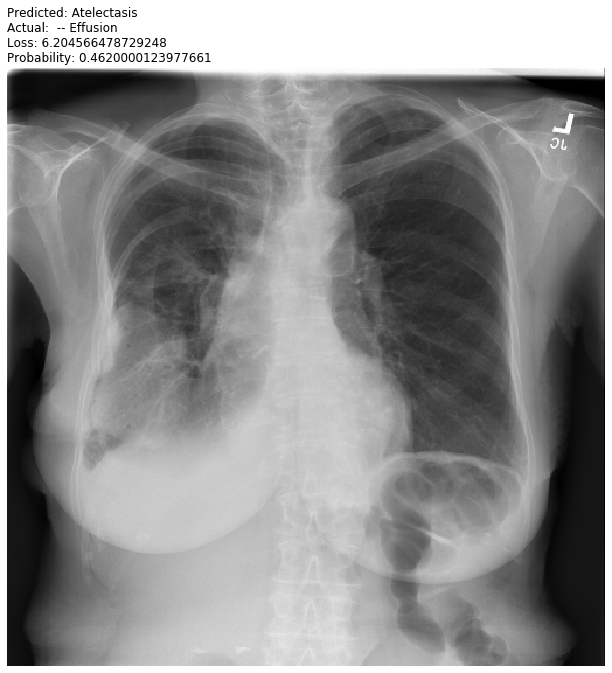

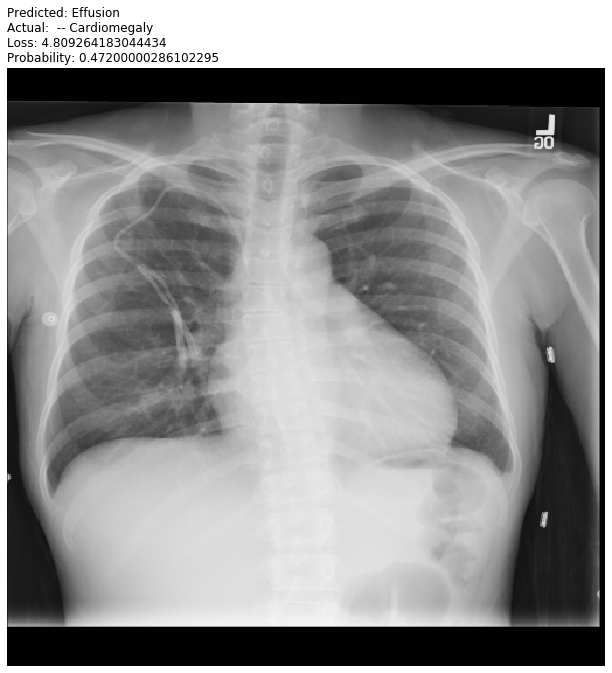

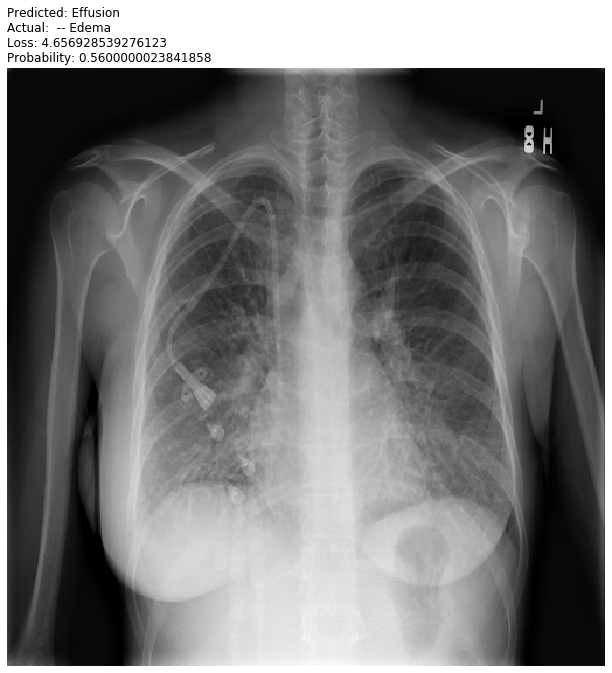

In [0]:
#plot top losses
interp.plot_multi_top_losses(3, figsize=(20,11))

In [0]:
interp.most_confused(min_val=100)

[('Atelectasis', 'Effusion', 387),
 ('Cardiomegaly', 'Atelectasis', 155),
 ('Cardiomegaly', 'Effusion', 143)]

In [0]:
#show class confusion
interp = ClassificationInterpretation.from_learner(learn

#class list == NIH categories
classlist = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 
             'Pleural_thickening', 'Cardiomegaly', 'Nodule Mass', 'Hernia']

#classlist = ['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Cardiomegaly'

classConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

In [0]:
#import fast ai widgets to start pruning data
from fastai.widgets import *
losses,idxs = interp.top_losses()
#to del img in test set use 'test_ds'
top_loss_paths = data.valid_ds.x[idxs]

IndexError: ignored

In [0]:
#file deleter widget for indivdual img deleting
fd = FileDeleter(file_paths=top_loss_paths)

In [0]:
# EXPORT MODEL
learner.export('codemash-resnet50-16bit'')

## Test the Finished Model

In [0]:
learn = load_learner(path, 'codemash-WideResNet-16bit.pkl')

In [0]:
test_data = learn.data.train_ds[0][0]

In [0]:
pred_class, pred_idx, outputs = learn.predict(open_image(f"{path}00001989_001.png"))

In [0]:
[f'{round(y.item()*100):3d}% - {c}' for c,y in zip(data.classes, outputs) if y > 0.75]

[' 77% - Lung_anomalies']

## Diagnosing and fixing problems

I added this section because of the GPU memory management issues i kept running into with working with the notebook. The basic problems comes from limited memory capicity in most cloud services. Periodically you will have to free up memory to keep the training process going. this section will help you identify memory bottle necks and fix them.

In [0]:
# use to identify gpu mem usage
!/opt/bin/nvidia-smi
!nvcc --version

#identify processes using gpu memory
print("\nKill process with 'ipykernel_launcher'\n")
!ps -aux|grep python

Sat Dec  7 22:38:36 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    31W / 250W |  16273MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# kill process with "ipkernel_launcher" to free gpu memory
!kill -9 148

# **Deploy model on webapp**

- www.render.com
- www.github.com


# Helpful Links

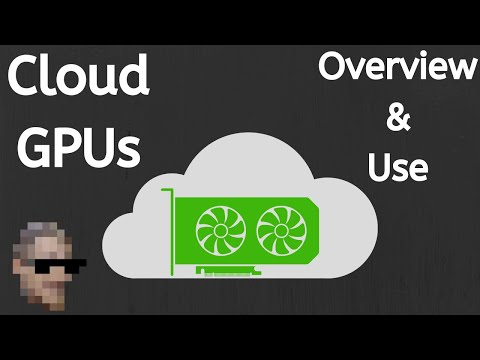

In [0]:
YouTubeVideo('qWGgK4IrH-s')

In [0]:
IFrame('https://lukeoakdenrayner.wordpress.com/2017/12/18/the-chestxray14-dataset-problems/',
       width='100%', height=500)

In [3]:
IFrame('https://arxiv.org/pdf/1901.07031.pdf',
       width='100%', height=500)

In [11]:
IFrame('https://arxiv.org/pdf/1902.07208.pdf',
       width='100%', height=500)

In [12]:
IFrame('https://github.com/beamandrew/medical-data',
       width='100%', height=500)

In [10]:
IFrame('https://github.com/lutherkhill',width='100%', height=500)

In [8]:
IFrame('https://pytorch.org',width='100%', height=500)